# Exploring South African crime Statistics from 2011 to 2023

This notebook seeks to take a deeper dive into the crime statistics reported by the SAPS from 2011/2012 to 2022/2023 and possiblly discover some gems of insight, hopefully actionable. All credit for the compilation of the XLSX file goes to Carl Jacobs (carl@openup.org.za) who can be contacted for more information regarding the XLSX file, available [here](https://data.openup.org.za/dataset/crime-stats-of-south-africa-2011-2022). The data contained in the XLSX file has been sourced from the SAPS, and can be found [here](https://www.saps.gov.za/services/crimestats.php)

![Image Title](https://afriforum.co.za/wp-content/uploads/2023/05/Untitled-design-16-1.png)

Below are several packages we'll use to delve into our dataset, along with brief explenations of what they do: 


In [51]:
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations and array manipulation
import matplotlib.pyplot as plt  # Plotting and visualization
import matplotlib.ticker as ticker
import seaborn as sns  # Statistical data visualization
import scipy  # Scientific computing and advanced mathematics
import statsmodels.api as sm  # Statistical modeling and testing
import plotly.express as px  # Interactive plotting and visualization

Loading our data will give us access to it via the notebook, let's go ahead and do that


In [24]:
#loading our excel file
crime_stats = pd.read_excel("C:\\Users\\bchok\\Downloads\\crime-stats-all-2011-2012-to-2022-2023.xlsx")

## Exploratory Data Analysis

In [25]:
# viewing the first 5 rows of our dataset
crime_stats

,Geography,Crime Category,Financial Year,Count
0,ZA,Contact Crimes,2011/2012,615935
1,ZA,Contact Crimes,2012/2013,608724
2,ZA,Contact Crimes,2013/2014,611574
3,ZA,Contact Crimes,2014/2015,616973
4,ZA,Contact Crimes,2015/2016,623223
...,...,...,...,...
835,WC,Aggravated Robberies,2022/2023,7150
836,WC,Contact Related Crimes,2022/2023,28595
837,WC,Property Related Crimes,2022/2023,66272
838,WC,Other Serious Crimes,2022/2023,96174


Let us get a sense of the makeup of each of these columns, i.e how many different categories can we find in say, Crime Category?

In [26]:
location = crime_stats['Geography'].unique()
categories = crime_stats['Crime Category'].unique()
year = crime_stats['Financial Year'].unique()

print("Unique Locations:")
print(location)

print("\nUnique Crime Categories:")
print(categories)

print("\nUnique Financial Years:")
print(year)

Unique Locations:
['ZA' 'EC' 'FS' 'GT' 'KZN' 'LIM' 'MP' 'NW' 'NC' 'WC']

Unique Crime Categories:
['Contact Crimes' 'Sexual Offences' 'Aggravated Robberies'
 'Contact Related Crimes' 'Property Related Crimes' 'Other Serious Crimes'
 'Crimes Detected as a Result of Police Action']

Unique Financial Years:
['2011/2012' '2012/2013' '2013/2014' '2014/2015' '2015/2016' '2016/2017'
 '2017/2018' '2018/2019' '2019/2020' '2020/2021' '2021/2022' '2022/2023']


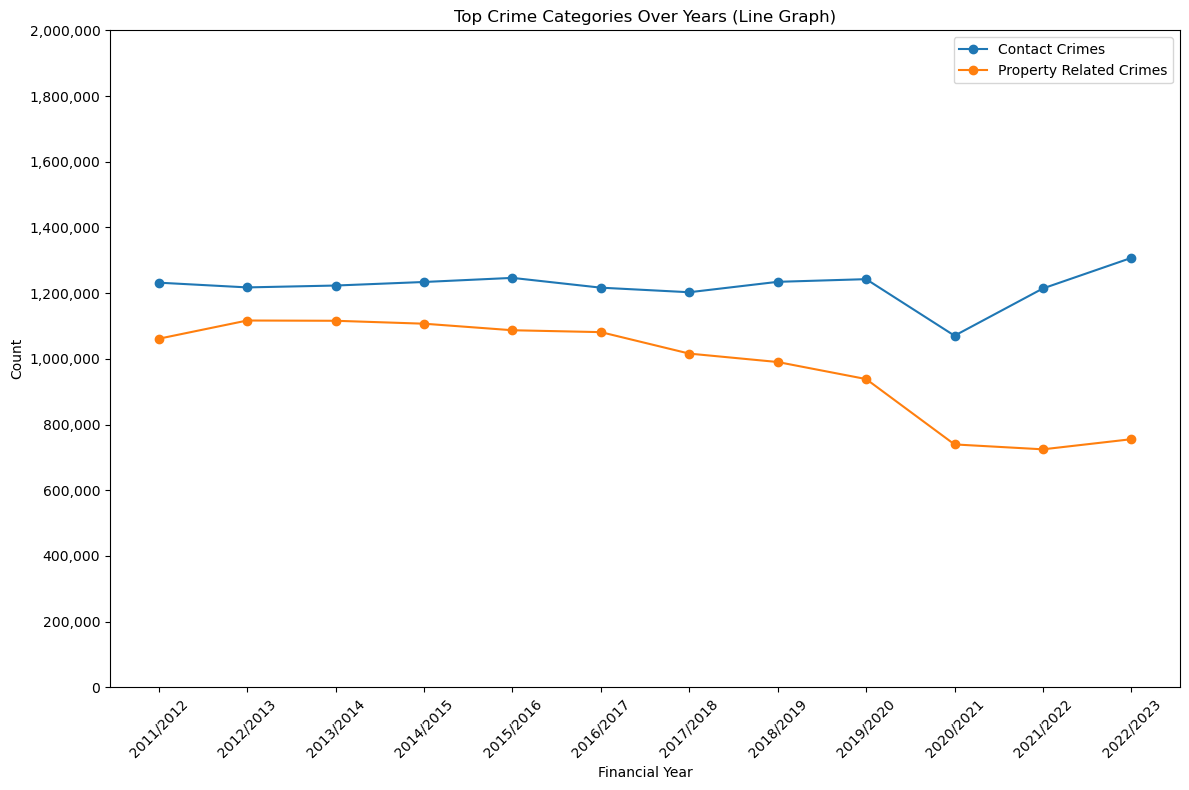

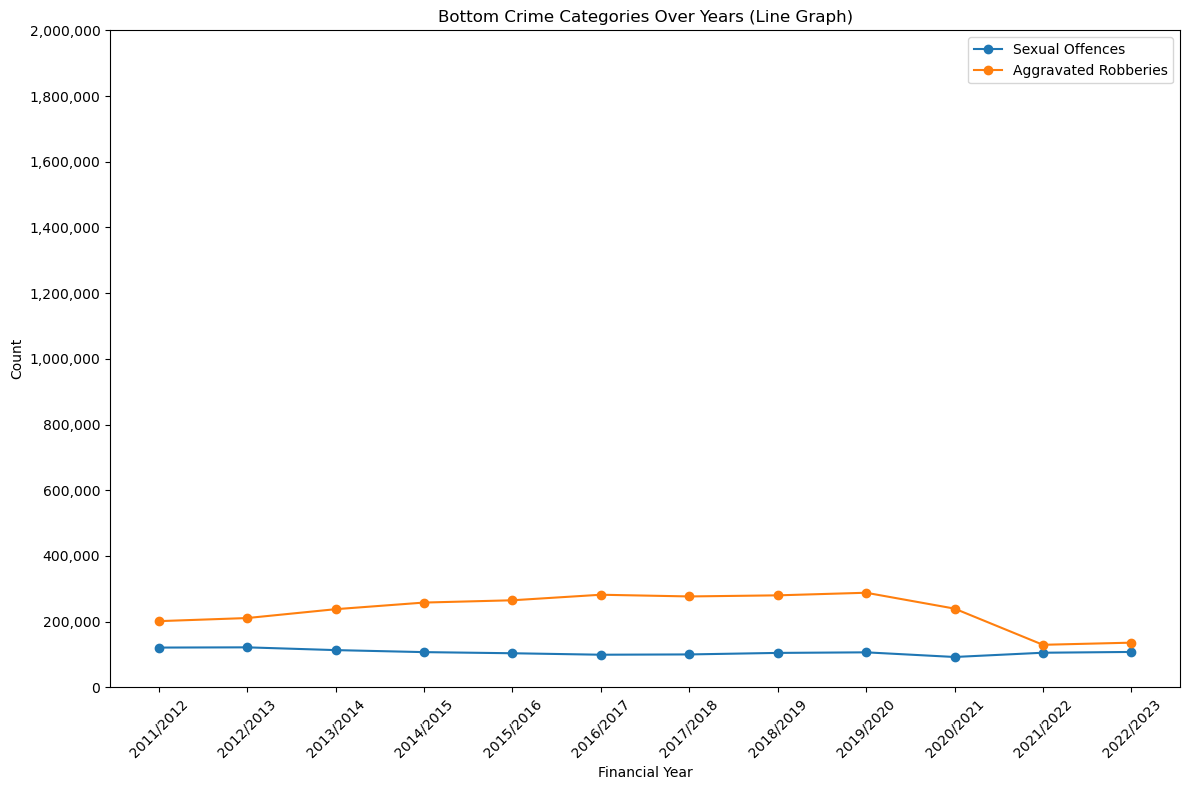

In [47]:
# Grouping the data by 'Financial Year' and 'Crime Category' and summing the counts
crime_counts_over_years = crime_stats.groupby(['Financial Year', 'Crime Category'])['Count'].sum().unstack()

# Plotting the data as a line graph with custom colors
fig, ax = plt.subplots(figsize=(12, 8))

# Sorting categories based on total counts
sorted_categories = crime_counts_over_years.sum().sort_values(ascending=False).index

# Selecting top categories dynamically based on the highest counts
top_categories = sorted_categories[:2]  # Change the slice to adjust the number of top categories to display

# Plotting lines for top categories with custom colors
for category in top_categories:
    if category in crime_counts_over_years:
        ax.plot(crime_counts_over_years.index, crime_counts_over_years[category], label=category, marker='o')

ax.set_title('Top Crime Categories Over Years (Line Graph)')
ax.set_xlabel('Financial Year')
ax.set_ylabel('Count')

# Setting y-axis limit to 2,000,000
ax.set_ylim(0, 2000000)

# Setting y-axis ticks in steps of 200,000 without scientific notation
y_ticks = range(0, 2000001, 200000)
ax.set_yticks(y_ticks)
ax.yaxis.set_major_formatter('{:,.0f}'.format)  # Format ticks as integers

# Show the plot with a limited legend
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Grouping the data by 'Financial Year' and 'Crime Category' and summing the counts
crime_counts_over_years = crime_stats.groupby(['Financial Year', 'Crime Category'])['Count'].sum().unstack()

# Plotting the data as a line graph with custom colors
fig, ax = plt.subplots(figsize=(12, 8))

# Sorting categories based on total counts
sorted_categories = crime_counts_over_years.sum().sort_values(ascending=True).index

# Selecting bottom categories dynamically based on the lowest counts
bottom_categories = sorted_categories[:2]  # Change the slice to adjust the number of bottom categories to display

# Plotting lines for bottom categories with custom colors
for category in bottom_categories:
    if category in crime_counts_over_years:
        ax.plot(crime_counts_over_years.index, crime_counts_over_years[category], label=category, marker='o')

ax.set_title('Bottom Crime Categories Over Years (Line Graph)')
ax.set_xlabel('Financial Year')
ax.set_ylabel('Count')

# Setting y-axis limit to 2,000,000
ax.set_ylim(0, 2000000)

# Setting y-axis ticks in steps of 200,000 without scientific notation
y_ticks = range(0, 2000001, 200000)
ax.set_yticks(y_ticks)
ax.yaxis.set_major_formatter('{:,.0f}'.format)  # Format ticks as integers

# Show the plot with a limited legend
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

let's look at the 2022/2023 financial year and see which province has reported the highest number of crimes

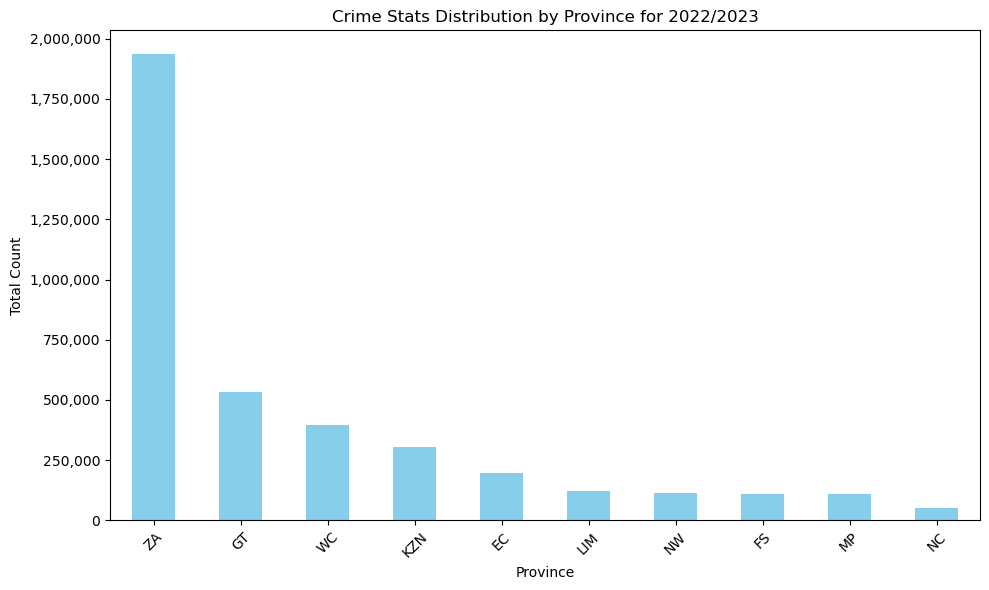

In [52]:
# Choose a specific year to analyze
selected_year = '2022/2023'

# Filter data for the selected year
crime_stats_selected_year = crime_stats[crime_stats['Financial Year'] == selected_year]

# Group data by 'Geography' and sum the counts
crime_stats_province = crime_stats_selected_year.groupby('Geography')['Count'].sum().sort_values(ascending=False)

# Plotting the distribution using a grouped bar chart
plt.figure(figsize=(10, 6))
crime_stats_province.plot(kind='bar', color='skyblue')
plt.title('Crime Stats Distribution by Province for {}'.format(selected_year))
plt.xlabel('Province')
plt.ylabel('Total Count')

# Set y-axis ticks format as comma-separated integers
formatter = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Initial overall crime stats observations

We can see that there are 840 rows in our data set, composed of 4 features: Geography, Crime Category, Financial Year and Count

We have 10 locations, one for each of the 9 provinces, as well as ZA which is takes into account all 9 provinces

We have 7 categories of crimes

We have 12 years of data to look at

The crime with the most reportings are contact crimes, whereas sexual offenses are the least reported of crimes

overall, almost 2 million crimes have been reported since 2011

## Delving into Gauteng Crime Stats

Gauteng is home to about 15.1 Million South Africans, roughly a quarter of the total population, and as we can see from our data, most crimes perpetrated take place there. Let's have a look at the types of crimes most prevalent in Gauteng, their count, and any trends to be observed over the years

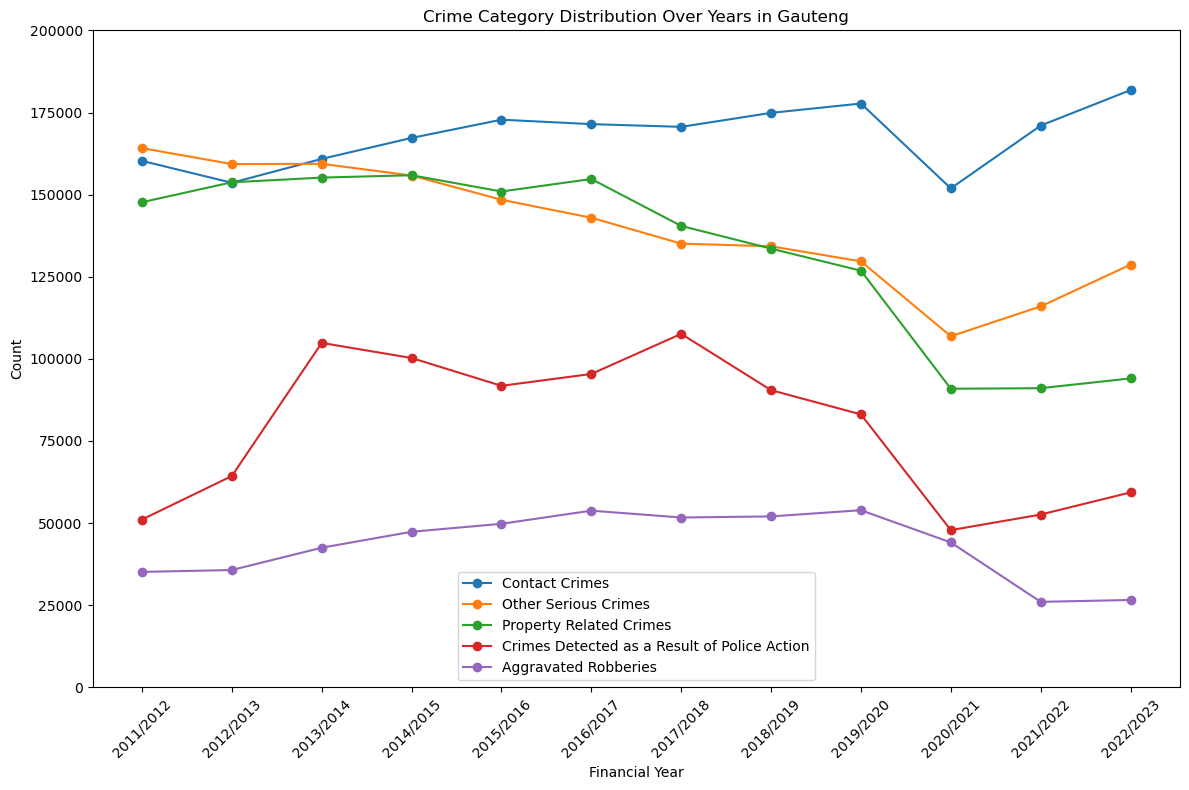

In [53]:
# Filter data for Gauteng province
crime_stats_gauteng = crime_stats[crime_stats['Geography'] == 'GT']

# Group data by 'Financial Year' and 'Crime Category' and sum the counts
crime_counts_gauteng_over_years = crime_stats_gauteng.groupby(['Financial Year', 'Crime Category'])['Count'].sum().unstack()

# Plotting the distribution of crime categories over the years
plt.figure(figsize=(12, 8))

# Selecting top categories based on the highest counts for better visualization
top_categories = crime_counts_gauteng_over_years.sum().sort_values(ascending=False).head(5).index

for category in top_categories:
    plt.plot(crime_counts_gauteng_over_years.index, crime_counts_gauteng_over_years[category], label=category, marker='o')

plt.title('Crime Category Distribution Over Years in Gauteng')
plt.xlabel('Financial Year')
plt.ylabel('Count')
plt.ylim(0, crime_counts_gauteng_over_years.max().max() * 1.1)  # Set y-axis limit for better visualization
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Gauteng crime stats findings

- **Decline in Robberies (2019/2020 - 2020/2021):**
  - There was a notable decrease in robberies across the board during this period.
  - This decline is likely attributed to the national lockdown imposed during that time.

- **Post-Lockdown Trends (After 2020/2021):**
  - Crime trends showed an upward trajectory after lockdown regulations eased.
  - Most categories returned to or exceeded pre-lockdown levels except for aggravated robberies.

- **Aggravated Robberies Post-Lockdown:**
  - Unlike other crime categories, aggravated robberies remained consistent.
  - It maintained a lower rate than any other point within the recorded dataset.